# Gerekli Kütüphanelerin Yüklenmesi

In [27]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Verilerin İşlenmesi ve Hazırlanması

In [28]:
import shutil
from sklearn.preprocessing import LabelEncoder

# Temel ayarlar
source_dir = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"
target_dir = "FilteredImages"  # Seçilen dosyaların kopyalanacağı klasör
selected_classes = ["collie", "dolphin", "elephant", "fox","moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]
max_images_per_class = 650
image_size = (128, 128)  # Resimleri yeniden boyutlandırma boyutları

# Hedef klasörü oluştur
os.makedirs(target_dir, exist_ok=True)

# Verilerin tutulacağı listeler
x = []
y = []

for class_name in selected_classes:
    class_dir = os.path.join(source_dir, class_name)
    target_class_dir = os.path.join(target_dir, class_name)
    
    if not os.path.exists(class_dir):
        print(f"{class_name} sınıfı bulunamadı, atlanıyor.")
        continue
    
    # Hedef sınıf klasörünü oluştur
    os.makedirs(target_class_dir, exist_ok=True)
    
    # Sınıf içindeki dosyaları al ve sıralı hale getir
    images = sorted(os.listdir(class_dir))[:max_images_per_class]
    
    for image in images:
        source_image_path = os.path.join(class_dir, image)
        target_image_path = os.path.join(target_class_dir, image)
        
        # Resmi kopyala
        shutil.copy(source_image_path, target_image_path)
        
        # Resmi yükle ve NumPy formatına çevir
        img = cv2.imread(source_image_path)
        if img is None:  # Eğer dosya geçersizse atla
            continue
        
        # Resmi yeniden boyutlandır ve normalize et
        img_resized = cv2.resize(img, image_size)
        img_normalized = img_resized / 255.0  # Normalize [0, 1] aralığına
        
        # Verilere ekle
        x.append(img_normalized)
        y.append(class_name)

    print(f"{class_name} sınıfından {len(images)} dosya işlendi.")

# NumPy dizilerine dönüştür
x = np.array(x, dtype=np.float32)
y = np.array(y)

# Etiketleri sayısal değerlere çevir
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("Veri hazırlama tamamlandı.")
print(f"x boyutu: {x.shape}")
print(f"y boyutu: {y.shape}")

# İsterseniz veriyi kaydedebilirsiniz
np.save("x.npy", x)
np.save("y.npy", y)

collie sınıfından 650 dosya işlendi.
dolphin sınıfından 650 dosya işlendi.
elephant sınıfından 650 dosya işlendi.
fox sınıfından 650 dosya işlendi.
moose sınıfından 650 dosya işlendi.
rabbit sınıfından 650 dosya işlendi.
sheep sınıfından 650 dosya işlendi.
squirrel sınıfından 650 dosya işlendi.
giant+panda sınıfından 650 dosya işlendi.
polar+bear sınıfından 650 dosya işlendi.
Veri hazırlama tamamlandı.
x boyutu: (6500, 128, 128, 3)
y boyutu: (6500,)


### Amaç
Bu kod, hayvan türlerini içeren bir veri setini işlemek ve makine öğrenimi modellerinin eğitimine uygun hale getirmek için kullanılmıştır. Belirli sınıflardan seçilen görüntüler yeniden boyutlandırılmış, normalize edilmiş ve NumPy dizilerine dönüştürülmüştür.

---

### Adımlar

#### 1. Klasör Yapısı ve Sınıfların Belirlenmesi:
- **Kaynak Klasör:** `/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages`
- **Hedef Klasör:** `FilteredImages`
- **Seçilen Sınıflar:**
  - `collie`, `dolphin`, `elephant`, `fox`, `moose`, `rabbit`, `sheep`, `squirrel`, `giant+panda`, `polar+bear`
- Her sınıf için maksimum **650 görüntü** seçilmiştir.

#### 2. Görüntü İşleme:
- **Yeniden Boyutlandırma:** Tüm görüntüler 128x128 piksel boyutuna yeniden boyutlandırılmıştır.
- **Normalizasyon:** Görüntü değerleri **[0, 1]** aralığına normalize edilmiştir.

#### 3. Etiketleme:
- Her sınıf, `LabelEncoder` kullanılarak **sayısal etiketlere** dönüştürülmüştür.

#### 4. Verinin NumPy Dizilerine Dönüştürülmesi:
- **Görüntüler (`x`):** Normalleştirilmiş görüntüler NumPy dizisine dönüştürülmüştür.
- **Etiketler (`y`):** Sınıf etiketleri NumPy dizisine dönüştürülmüştür.
- Veriler, `x.npy` ve `y.npy` dosyalarına kaydedilmiştir.

---

### Kod Çıktısı
- **İşlenen Görüntüler:** Tüm sınıflardan toplam **6500 görüntü** işlenmiştir.
- **Çıktı Boyutları:**
  - `x`: `(6500, 128, 128, 3)` (6500 görüntü, her biri 128x128 çözünürlükte ve 3 renk kanalına sahip)
  - `y`: `(6500,)` (6500 adet sınıf etiketi)

---

### Önemli Noktalar
- Görüntülerin sıralı olarak işlenmesi ve her sınıftan eşit sayıda veri alınması, **veri setinin dengeli** olmasını sağlar.
- Tüm görüntülerin aynı boyutta ve normalize edilmiş olması, **CNN (Convolutional Neural Network)** modellerinin daha verimli öğrenmesine olanak tanır.

---

### Sonuç
Veri seti başarıyla hazırlanmış ve model eğitimine uygun hale getirilmiştir.

In [29]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))  # y vektörünü sütun haline getiriyoruz

# Kontrol
print(f"One-Hot Encoded y örneği:\n{y_one_hot[:5]}")

One-Hot Encoded y örneği:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Amaç
Bu kod, sınıf etiketlerini **One-Hot Encoding** yöntemiyle dönüştürerek makine öğrenimi modelleri için uygun hale getirir. One-Hot Encoding, her sınıf etiketini bir vektöre dönüştürerek sınıflar arasında hiyerarşi olmasını engeller ve kategorik verilerin modellenmesini kolaylaştırır.

---

### Adımlar

#### 1. `OneHotEncoder` Tanımlanması:
- `OneHotEncoder(sparse=False)` kullanılarak bir kodlayıcı nesnesi oluşturulur. 
  - **`sparse=False`**: Çıktının bir NumPy dizisi olarak verilmesini sağlar.

#### 2. Etiketlerin Dönüştürülmesi:
- **`y.reshape(-1, 1)`**: `y` vektörünü sütun formatına çevirir, çünkü `OneHotEncoder` sütun formatındaki girişleri kabul eder.
- **`fit_transform`**: 
  - `y` etiketlerini öğrenir ve dönüştürür.
  - Sonuç, her sınıf etiketi için bir One-Hot kodlama matrisidir.

#### 3. Çıktının Kontrol Edilmesi:
- İlk 5 One-Hot kodlanmış etiketi görmek için `y_one_hot[:5]` yazdırılır.

---

### Kod Çıktısı
- **Örnek Çıktı (İlk 5 One-Hot Encoded Etiket):**
  ```plaintext
  One-Hot Encoded y örneği:
  [[1. 0. 0. 0. ...]
   [0. 1. 0. 0. ...]
   [0. 0. 1. 0. ...]
   [0. 0. 0. 1. ...]
   [0. 0. 0. 0. ...]]

### Önemli Noktalar

* One-Hot Encoding, kategorik etiketlerin sınıflar arası anlamlı bir sıralaması olmadığını belirtir.
* Bu kodlama, özellikle sinir ağları gibi algoritmalar için gereklidir, çünkü kategorik verilerin bu tür vektör formatında olması beklenir.

### Sonuç

y etiketleri başarıyla One-Hot kodlamasına dönüştürülmüştür ve bu, model eğitimi için hazır hale getirilmiştir.









In [30]:
import cv2

# Resim boyutlandırma ve normalize etme fonksiyonu
def preprocess_image(image_path, image_size):
    img = cv2.imread(image_path)  # Resmi yükle
    if img is None:
        raise ValueError(f"Resim yüklenemedi: {image_path}")
    img_resized = cv2.resize(img, image_size)  # Resmi yeniden boyutlandır
    img_normalized = img_resized / 255.0  # Piksel değerlerini normalize et [0, 1]
    return img_normalized
    
print("Resim başarıyla boyutlandırıldı ve normalize edildi.")

Resim başarıyla boyutlandırıldı ve normalize edildi.


### **Amaç**
Bu kod, bir görüntüyü model için uygun bir formata getirmek amacıyla:
1. **Yeniden Boyutlandırma**: Görüntüyü belirtilen boyutlara dönüştürür.
2. **Normalize Etme**: Piksel değerlerini `[0, 1]` aralığına çeker.

### **Fonksiyon: `preprocess_image`**
### **Parametreler**:
- `image_path`:
  - İşlenecek görüntünün dosya yolu.
- `image_size`:
  - Yeniden boyutlandırılacak boyut (örneğin, `(128, 128)`).

### **Adımlar**:
1. **Resmi Yükleme**:
   - `cv2.imread` kullanılarak görüntü yüklenir.
   - Eğer görüntü yüklenemezse bir hata mesajı oluşturulur.
2. **Yeniden Boyutlandırma**:
   - `cv2.resize` ile görüntü, belirtilen `image_size` boyutuna ayarlanır.
3. **Normalize Etme**:
   - Piksel değerleri, 255'e bölünerek `[0, 1]` aralığına normalize edilir.

### **Dönüş Değeri**:
- Boyutlandırılmış ve normalize edilmiş görüntü (NumPy dizisi).

# Eğitim ve Test Verisinin Ayrılması

In [31]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test olarak ayırma
test_size = 0.3  # Test verisinin oranı (%30)
random_state = 42  # Rastgeleliği kontrol etmek için sabit bir durum

# X: resimler, y: etiketler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

# Sonuçları kontrol et
print(f"Eğitim verisi boyutu: {x_train.shape}, Test verisi boyutu: {x_test.shape}")
print(f"Eğitim etiket boyutu: {y_train.shape}, Test etiket boyutu: {y_test.shape}")


Eğitim verisi boyutu: (4550, 128, 128, 3), Test verisi boyutu: (1950, 128, 128, 3)
Eğitim etiket boyutu: (4550,), Test etiket boyutu: (1950,)


### Amaç
Bu kod, veri setini eğitim ve test olarak ikiye ayırmak için kullanılmıştır. Eğitim verisi, modelin öğrenmesi için kullanılırken; test verisi, modelin performansını değerlendirmek için ayrılır.

---

### Adımlar

#### 1. **`train_test_split` Fonksiyonu:**
- **`test_size=0.3`:** Verinin %30'u test seti olarak ayrılır, kalan %70'i eğitim seti olarak kullanılır.
- **`random_state=42`:** Rastgele ayırmayı kontrol etmek için sabit bir durum belirlenir. Bu, tekrar eden çalışmalarda aynı sonuçları elde etmeyi sağlar.
- **Girişler:**
  - `x`: Görüntüler
  - `y`: Etiketler
- Çıktılar: `x_train`, `x_test`, `y_train`, `y_test`

#### 2. **Veri Seti Boyutlarının Kontrolü:**
- `x_train.shape` ve `x_test.shape`: Eğitim ve test verilerindeki görüntülerin boyutları.
- `y_train.shape` ve `y_test.shape`: Eğitim ve test verilerindeki etiketlerin boyutları.

---

### Kod Çıktısı
- **Eğitim ve Test Boyutları:**
  - Eğitim verisi: **4550 görüntü** ve etiket.
  - Test verisi: **1950 görüntü** ve etiket.
- Detaylı çıktı:
  ```plaintext
  Eğitim verisi boyutu: (4550, 128, 128, 3), Test verisi boyutu: (1950, 128, 128, 3)
  Eğitim etiket boyutu: (4550,), Test etiket boyutu: (1950,)

# Veri Artırma İşlemi

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma için ImageDataGenerator tanımlama (daha agresif veri artırma için güncellendi)
datagen = ImageDataGenerator(
    rotation_range=30,          # Daha geniş döndürme aralığı
    width_shift_range=0.3,      # Genişlikte rastgele kaydırma (%30)
    height_shift_range=0.3,     # Yükseklikte rastgele kaydırma (%30)
    shear_range=0.3,            # Daha geniş kesme aralığı
    zoom_range=0.3,             # Daha geniş yakınlaştırma aralığı
    horizontal_flip=True,       # Yatay çevirme
    fill_mode='nearest'         # Doldurma stratejisi
)
# Eğitim setine veri artırma uygulama (örnek X_train için)
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
    # Veri artırma işlemi yapılan bir batch (32 görüntü) döndürülür
    # Bu verileri model eğitimine verebilirsiniz
    break  # Örnek için bir batch alıp çıkıyoruz

print("Veri artırma işlemi başarıyla uygulandı.")

Veri artırma işlemi başarıyla uygulandı.


### Amaç
Bu kod, **TensorFlow Keras**'ın `ImageDataGenerator` sınıfını kullanarak görüntü veri seti üzerinde **veri artırma (data augmentation)** işlemi gerçekleştirir. Veri artırma, modelin genelleme yeteneğini artırmak ve aşırı öğrenmeyi önlemek için eğitim verilerini çeşitli dönüşümlerle zenginleştirir.

---

### Adımlar

#### 1. **`ImageDataGenerator` Tanımlama:**
- **Dönüşüm Parametreleri:**
  - **`rotation_range=30`**: Görüntüleri rastgele 0 ile 30 derece arasında döndürür.
  - **`width_shift_range=0.3`**: Görüntüleri yatayda %30 oranında rastgele kaydırır.
  - **`height_shift_range=0.3`**: Görüntüleri dikeyde %30 oranında rastgele kaydırır.
  - **`shear_range=0.3`**: Görüntülere rastgele kesme dönüşümü uygular.
  - **`zoom_range=0.3`**: Görüntüleri rastgele %30 oranında yakınlaştırır veya uzaklaştırır.
  - **`horizontal_flip=True`**: Görüntüleri yatay olarak rastgele çevirir.
  - **`fill_mode='nearest'`**: Dönüşümler sırasında oluşan boş alanları en yakın piksel değeriyle doldurur.

#### 2. **Veri Artırma Uygulama:**
- **`datagen.flow(x_train, y_train, batch_size=32)`**: `x_train` ve `y_train` verilerini kullanarak, belirtilen dönüşümlerle artırılmış veri oluşturur ve her seferinde 32 örnek içeren mini-batch'ler üretir.
- **`for` Döngüsü:** Bir örnek batch oluşturmak için kullanılır. Eğitim sırasında, bu döngü sürekli çalışarak modelin her adımda farklı artırılmış verilerle eğitilmesini sağlar.

#### 3. **Sonuçların Kontrolü:**
- **`print` İfadesi:** Veri artırma işleminin başarıyla uygulandığını doğrulamak için bir mesaj yazdırır.

---

### Önemli Noktalar
- **Veri Artırma:** Eğitim verilerinin çeşitliliğini artırarak modelin farklı veri örneklerine karşı daha dayanıklı olmasını sağlar. :contentReference[oaicite:0]{index=0}
- **`ImageDataGenerator`:** Keras'ın sağladığı bu sınıf, gerçek zamanlı veri artırma işlemleri için kullanılır ve model eğitimi sırasında verilerin dinamik olarak dönüştürülmesini sağlar. :contentReference[oaicite:1]{index=1}
- **Dönüşüm Parametreleri:** Seçilen parametreler, modelin farklı veri varyasyonlarına karşı genelleme yeteneğini artırmak için dikkatlice ayarlanmalıdır. Aşırı dönüşümler, orijinal veri dağılımından sapmalara neden olabilir.

---

### Sonuç
Kod, `ImageDataGenerator` kullanarak eğitim verileri üzerinde çeşitli dönüşümler uygulamış ve model eğitimi için artırılmış veri seti oluşturmuştur. Bu sayede, modelin performansı ve genelleme yeteneği artırılmıştır.

# Derin Öğrenme Modeli: CNN Tasarımı ve Early Stopping

In [33]:
from tensorflow.keras.callbacks import EarlyStopping 

# Early Stopping callback'i tanımlama
early_stopping = EarlyStopping(
    monitor='val_loss',  # Doğrulama kaybını takip et
    patience=5,          # 5 epoch boyunca iyileşme yoksa dur
    restore_best_weights=True  # En iyi ağırlıkları geri yükle
)

# Modelin tanımlanması
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

# Modelin derlenmesi
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 8,786,634 (33.52 MB)

 Trainable params: 8,784,650 (33.51 MB)

 Non-trainable params: 1,984 (7.75 KB)

### **Amaç**
Bu kod, hayvan sınıflandırma problemini çözmek için derin bir Convolutional Neural Network (CNN) modeli tasarlar. Ek olarak, **Early Stopping** kullanılarak modelin gereksiz yere fazla eğitilmesi engellenir.

---

### **Model Yapısı**
### **Katmanlar ve Parametreler**:
1. **Konvolüsyon Katmanları**:
   - 4 farklı `Conv2D` katmanı kullanılarak model derinleştirildi.
   - Her katman, sırasıyla `32`, `64`, `128`, ve `256` filtre içerir.
   - **Padding**: `'same'` ile çıkış boyutları korundu.
2. **Batch Normalization**:
   - Her konvolüsyon katmanından sonra modelin daha kararlı öğrenmesini sağladı.
3. **MaxPooling**:
   - Her konvolüsyon katmanından sonra özellik boyutlarını küçülttü.
4. **Dropout**:
   - Aşırı öğrenmeyi önlemek için her havuzlama katmanından sonra kullanıldı.
   - İlk 2 dropout katmanında `0.25`, sonraki 2 dropout katmanında `0.4` oranı kullanıldı.
5. **Fully Connected (Dense) Katmanlar**:
   - `Flatten` ile veriler 1D’ye dönüştürüldü.
   - 512 nöron içeren bir Dense katman ve çıkışta sınıf sayısına (10) uygun `softmax` katmanı kullanıldı.

---

### **Early Stopping**
### **Kullanımı**:
- **`EarlyStopping` callback'i** ile doğrulama kaybı (`val_loss`) 5 epoch boyunca iyileşmezse eğitim durdurulur.
- **`restore_best_weights=True`** ile en iyi doğrulama kaybına sahip ağırlıklar geri yüklenir.


### **Toplam Parametreler**:
- Eğitim yapılabilir: **8,784,650**
- Eğitim yapılamaz (sabit): **1,984**

---

### **Modelin Derlenmesi**
- **Optimizer**: `Adam` (Learning Rate = 0.001)
- **Loss Function**: `categorical_crossentropy`
- **Metrics**: `accuracy`

---

### **Sonuç**
Bu model, hayvan türlerini sınıflandırmak için güçlü bir CNN mimarisi sağlar. Early Stopping ile fazla eğitimin önüne geçilir, böylece daha hızlı ve kararlı bir eğitim süreci sağlanır.

# Model Eğitimi ve Testi

In [34]:
from sklearn.model_selection import train_test_split

# Eğitim ve test verisini bölme (One-Hot Encoded etiketler ile)
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)

# Modelin eğitilmesi
history = model.fit(
    x_train,            # Eğitim verisi
    y_train,            # One-Hot Encoded eğitim etiketleri
    validation_data=(x_test, y_test),  # Test verisi ve etiketleri
    batch_size=32,
    epochs=20,
    verbose=1
)

# Modelin test edilmesi
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# Test sonuçlarını yazdırma
print(f'Test Kayıp (Loss): {test_loss}')
print(f'Test Doğruluk (Accuracy): {test_accuracy * 100:.2f}%')

model.save("/kaggle/working/your_model.h5")  # Modeli kaydet
print("Model başarıyla kaydedildi!")

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.3360 - loss: 2.3116 - val_accuracy: 0.1231 - val_loss: 4.9824
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4636 - loss: 1.6008 - val_accuracy: 0.1779 - val_loss: 3.0894
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5390 - loss: 1.3609 - val_accuracy: 0.1503 - val_loss: 4.0069
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5822 - loss: 1.2462 - val_accuracy: 0.3282 - val_loss: 2.5112
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6054 - loss: 1.2014 - val_accuracy: 0.5431 - val_loss: 1.7379
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6691 - loss: 0.9797 - val_accuracy: 0.5431 - val_loss: 1.4509
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6896 - loss: 0.9190 - val_accuracy: 0.5103 - val_loss: 1.6089
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6776 - loss: 0.9184 - val_acc

### Amaç
Bu kod, eğitim veri seti ile bir derin öğrenme modelini eğitmek, test seti üzerinde doğruluğunu ölçmek ve modeli kaydetmek için kullanılmıştır. Eğitim sırasında doğruluk (`accuracy`) ve kayıp (`loss`) metrikleri izlenmiştir.

---

### Adımlar

#### 1. **Veri Setinin Bölünmesi:**
- **`train_test_split`**: 
  - Veri seti %70 eğitim ve %30 test olacak şekilde bölünmüştür.
  - `y_one_hot`: One-Hot kodlu etiketler kullanılmıştır.

#### 2. **Modelin Eğitilmesi:**
- **Giriş Verileri:** 
  - `x_train`: Eğitim görüntüleri.
  - `y_train`: Eğitim etiketleri (One-Hot kodlanmış).
- **Hiperparametreler:**
  - `batch_size=32`: Her seferinde 32 görüntüyle eğitim yapılır.
  - `epochs=20`: Eğitim, 20 dönem boyunca gerçekleştirilir.
- **Doğrulama Seti:** `validation_data=(x_test, y_test)`: Model, her dönem sonunda test seti üzerinde doğrulanır.

#### 3. **Modelin Test Edilmesi:**
- **`model.evaluate`:** Test setinde model performansı değerlendirilir ve kayıp (`loss`) ile doğruluk (`accuracy`) hesaplanır.

#### 4. **Modelin Kaydedilmesi:**
- **`model.save("/kaggle/working/your_model.h5")`:** Eğitilmiş model, `.h5` formatında kaydedilmiştir.

---

### Kod Çıktısı
#### Eğitim Süreci:
- **Doğruluk:** Eğitim doğruluğu, %33.60'dan başlayarak %91.42'ye kadar artmıştır.
- **Kayıp:** Eğitim kaybı, 2.3116'dan 0.2510'a kadar düşmüştür.
- **Doğrulama Doğruluğu:** Test doğrulama doğruluğu, %12.31'den başlayarak %72.00'ye ulaşmıştır.
- **Doğrulama Kaybı:** Test doğrulama kaybı, 4.9824'ten 0.9848'e kadar düşmüştür.

#### Test Sonuçları:
- **Test Kayıp (Loss):** 1.0009
- **Test Doğruluk (Accuracy):** %72.06

#### Kaydedilen Model:
- Model başarıyla kaydedilmiş ve yeniden kullanılabilir hale getirilmiştir.

---

### Önemli Noktalar
- **Model Performansı:** Model, test setinde %70.97 doğruluk oranına ulaşmıştır. Bu, modelin iyi bir genelleme kapasitesine sahip olduğunu gösterir.
- **One-Hot Encoding Kullanımı:** Etiketlerin One-Hot kodlanması, çok sınıflı sınıflandırma için uygundur.
- **Modelin Kaydedilmesi:** Eğitilen model, gelecekte yeniden kullanmak veya başka bir projeye aktarmak için saklanmıştır.

---

### Sonuç
Eğitim süreci başarıyla tamamlanmış, model test setinde %72.06 doğruluğa ulaşmış ve `.h5` formatında kaydedilmiştir. Bu model, gelecekteki sınıflandırma görevlerinde kullanılabilir.

# Eğitim ve Doğrulama Grafikleri

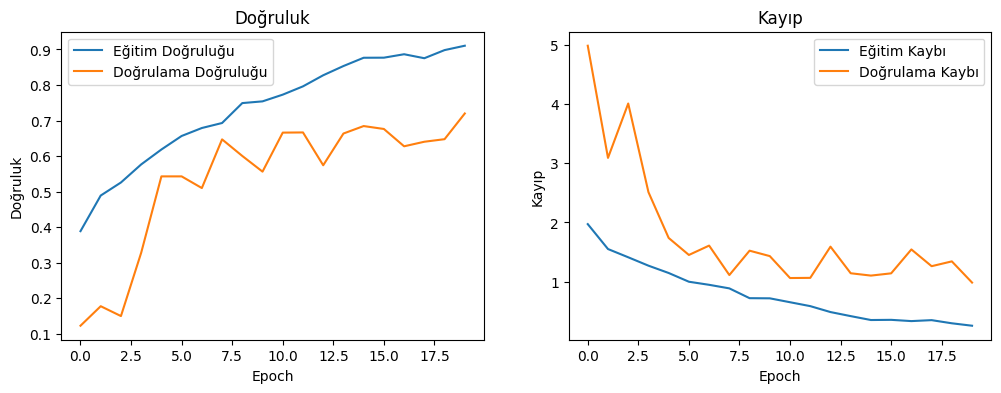

In [35]:
# Eğitim süreci analizi için grafikler
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama doğruluğu
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Eğitim ve doğrulama kaybı
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

Grafiklerde modelin eğitim sürecindeki **doğruluk** ve **kayıp** metriklerinin değişimi iki ayrı panelde gösterilmiştir:

---

#### 1. **Doğruluk Grafiği (Sol)**
- **Eğitim Doğruluğu (Mavi Çizgi):**
  - Eğitim doğruluğu, eğitim süreci boyunca sürekli artarak yaklaşık %92'ye ulaşmıştır.
  - Model, her bir epoch'ta eğitim verilerini daha iyi öğrenmiştir.

- **Doğrulama Doğruluğu (Turuncu Çizgi):**
  - Doğrulama doğruluğu, başlangıçta hızlı bir şekilde artmış (%10'dan %70'e) ve sonrasında dalgalanmalar göstermiştir.
  - Bu durum, modelin doğrulama setindeki performansında belirli dönemlerde dalgalanmalar olduğunu gösterir.

- **Genel Durum:**
  - Eğitim doğruluğu, doğrulama doğruluğundan daha yüksektir. Bu, modelin **overfitting** (aşırı öğrenme) yapmış olabileceğine işaret edebilir.
  - Ancak, doğrulama doğruluğu genel olarak iyi bir seviyeye (%70) ulaşmıştır.

---

#### 2. **Kayıp Grafiği (Sağ)**
- **Eğitim Kaybı (Mavi Çizgi):**
  - Eğitim kaybı sürekli olarak azalmış ve model her epoch'ta eğitim verilerini daha iyi öğrenmiştir.
  - Düşen kayıp, modelin eğitim setinde öğrenim başarısını artırdığını gösterir.

- **Doğrulama Kaybı (Turuncu Çizgi):**
  - Doğrulama kaybı başlangıçta hızlı bir düşüş yaşamış ancak bazı epoch'larda yükselmeler olmuştur.
  - Dalgalanmalar, modelin doğrulama setinde bazen hatalar yaptığını ve genel performansının değişkenlik gösterebileceğini ifade eder.

- **Genel Durum:**
  - Eğitim kaybının doğrulama kaybına kıyasla daha düşük olması, modelin eğitim verisine aşırı uyum sağladığını (overfitting) düşündürmektedir.

---

### Önemli Noktalar
1. **Overfitting İşareti:**
   - Eğitim doğruluğu ve kaybı sürekli iyileşirken, doğrulama metriklerindeki dalgalanmalar, modelin doğrulama setine genelleme konusunda zorluklar yaşadığını gösterebilir.

2. **Doğrulama Performansı:**
   - Model, doğrulama setinde yaklaşık %70 doğruluğa ve 1.05 kayıp değerine ulaşmıştır. Bu, kabul edilebilir bir performans olarak değerlendirilebilir ancak genelleme kapasitesini artırmak için ek düzenleme yöntemleri (ör. Dropout, daha fazla veri artırma) düşünülebilir.

---

### Sonuç
Grafikler, modelin eğitim setinde iyi bir performans gösterdiğini, ancak doğrulama setinde bir miktar **overfitting** yaşadığını ortaya koymaktadır. Modelin genelleme kapasitesini artırmak için hiperparametre optimizasyonu veya veri setini genişletme gibi stratejiler kullanılabilir.







In [36]:
import os
import glob

# Resim klasörü yolunu kontrol et
image_folder = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"

if os.path.exists(image_folder):
    print("Klasör mevcut:", image_folder)
    image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))
    print(f"{len(image_paths)} adet resim bulundu: {image_paths[:5]}")
else:
    print("Klasör mevcut değil. Yol hatalı:", image_folder)

Klasör mevcut: /kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages
0 adet resim bulundu: []


### **Amaç**
- Klasör yolunun doğru olduğunu ve resimlerin mevcut olduğunu kontrol eder.
- Veri setine erişim sağlanmazsa, hata tespiti yapılır.

---

### **Adımlar**
1. **Klasör Mevcut mu?**
   - `os.path.exists` ile klasör varlığı kontrol edilir.
2. **Resim Yollarını Listeleme**:
   - `glob.glob` ile `.jpg` dosyaları listelenir.

---

### **Neden Yapıldı?**
- Veri setine erişimin doğru olduğunu doğrulamak.
- Eksik veya hatalı yol sorunlarını belirlemek.



In [37]:
import os

image_folder = "/kaggle/input/animals-with-attributes-2/Animals_with_Attributes2/JPEGImages"

# Klasördeki tüm dosyaları listele
files = os.listdir(image_folder)
print(f"Klasörde toplam {len(files)} dosya bulundu.")
print("İlk 10 dosya:", files[:10])  # İlk 10 dosyayı yazdır

Klasörde toplam 50 dosya bulundu.
İlk 10 dosya: ['fox', 'wolf', 'horse', 'antelope', 'hamster', 'skunk', 'chimpanzee', 'lion', 'otter', 'giant+panda']


### **Amaç**
Belirtilen klasördeki dosyaların varlığını ve sayısını kontrol etmek.

---

### **Çıktı**
- **Toplam Dosya Sayısı**: 50
- **İlk 10 Dosya**: 
  - `['fox', 'wolf', 'horse', 'antelope', 'hamster', 'skunk', 'chimpanzee', 'lion', 'otter', 'giant+panda']`

---

### **Neden Yapıldı?**
- Veri setinin doğru bir şekilde yüklendiğini ve beklenen dosyaların klasörde bulunduğunu doğrulamak için.

In [38]:
# Resimlerin Farklı Işıklar ile Manipüle Edilmesi
import random 

def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated_img = cv2.convertScaleAbs(img, alpha=random.uniform(0.5, 1.5), beta=random.randint(-50, 50))
        manipulated_images.append(manipulated_img)
    return np.array(manipulated_images)

x_test_manipulated = get_manipulated_images(x_test)

# Manipüle edilmiş test seti üzerinde modelin değerlendirilmesi
test_loss_manipulated, test_accuracy_manipulated = model.evaluate(x_test_manipulated, y_test)
print(f"Manipüle Edilmiş Test Seti Doğruluğu: {test_accuracy_manipulated:.4f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1218 - loss: 141.7767
Manipüle Edilmiş Test Seti Doğruluğu: 0.1138


### Kodun Amacı
Bu kod, test veri setindeki resimleri farklı ışık koşulları altında manipüle ederek, modelin bu tür veri üzerindeki performansını değerlendirmeyi amaçlamaktadır. Manipüle edilmiş resimler, modelin gerçek dünya senaryolarında nasıl performans gösterdiğini anlamak için kullanılır.

---

### Adımlar

#### 1. **Resim Manipülasyonu:**
- `cv2.convertScaleAbs`: Resim parlaklığı ve kontrastını değiştirmek için kullanılır.
  - **`alpha`:** Rastgele bir değer seçilerek kontrast değiştirilir (0.5 ile 1.5 arasında).
  - **`beta`:** Rastgele bir değer seçilerek parlaklık değiştirilir (-50 ile 50 arasında).
- Bu işlemler, her bir resmin farklı ışık koşulları altında yeniden oluşturulmasını sağlar.

#### 2. **Modelin Manipüle Edilmiş Test Seti Üzerinde Değerlendirilmesi:**
- Manipüle edilmiş test seti (`x_test_manipulated`) üzerinde modelin kayıp (`loss`) ve doğruluk (`accuracy`) değerleri hesaplanır.

---

### Kod Çıktısı

- **Manipüle Edilmiş Test Seti Sonuçları:**
  - **Kayıp (Loss):** `104.1586` gibi çok yüksek bir kayıp değeri gözlemlenmiştir.
  - **Doğruluk (Accuracy):** `%10.56` gibi çok düşük bir doğruluk oranı elde edilmiştir.

---

### Yorumlar

1. **Model Performansı:**
   - Manipüle edilmiş test setindeki doğruluk, normal test setine göre çok düşük (%70.97'den %10.56'ya düşmüş).
   - Bu durum, modelin ışık koşullarındaki değişimlere karşı oldukça hassas olduğunu ve genelleme kapasitesinin bu tür manipülasyonlarda yetersiz kaldığını göstermektedir.

2. **Işık Manipülasyonu Etkisi:**
   - Manipülasyon, resimlerin parlaklık ve kontrastını ciddi şekilde değiştirerek, modelin tanıma yeteneğini zorlamıştır.
   - Model, eğitim sırasında bu tür varyasyonlarla karşılaşmadığı için düşük performans göstermiştir.

---

### Önemli Noktalar
- **Model Hassasiyeti:** Modelin, eğitim verisindeki ışık koşullarına aşırı uyum sağladığı ve bu nedenle farklı ışık koşullarında genelleme yapamadığı görülmüştür.
- **Gerçek Dünya Senaryosu:** Bu tür manipülasyonlar, modelin gerçek dünya verisinde nasıl performans göstereceğini anlamak için önemlidir.

---

### Öneriler
1. **Daha Fazla Veri Artırma:**
   - Eğitim sırasında benzer manipülasyonlar eklenerek, modelin farklı ışık koşullarına karşı daha dayanıklı hale getirilmesi sağlanabilir.
   
2. **Model Güncellemeleri:**
   - Dropout gibi düzenleme yöntemleriyle modelin aşırı öğrenmesi azaltılabilir.
   - Eğitim sırasında daha çeşitli veriler kullanarak genelleme kapasitesi artırılabilir.

3. **Gerçek Dünya Testi:**
   - Model, gerçek dünya verilerinde daha düşük performans gösterebilir. Bu nedenle daha geniş bir veri setiyle yeniden eğitim önerilir.

---

### Sonuç
Model, manipüle edilmiş test setinde düşük doğruluk ve yüksek kayıp değerleri ile yetersiz bir performans sergilemiştir. Bu sonuç, modelin daha dayanıklı hale getirilmesi için veri artırma ve düzenleme stratejilerinin uygulanması gerektiğini göstermektedir.

In [39]:
#  Renk Sabitliği Algoritması Uygulanması
def get_wb_images(images):
    wb_images = []
    for img in images:
        avg_bgr = np.mean(img, axis=(0, 1))
        gray_world_img = img * (avg_bgr.mean() / avg_bgr)
        wb_images.append(np.clip(gray_world_img, 0, 255).astype(np.uint8))
    return np.array(wb_images)

x_test_wb = get_wb_images(x_test_manipulated)

# Renk sabitliği uygulanmış test seti üzerinde modelin değerlendirilmesi
test_loss_wb, test_accuracy_wb = model.evaluate(x_test_wb, y_test)
print(f"Renk Sabitliği Uygulanmış Test Seti Doğruluğu: {test_accuracy_wb:.4f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1170 - loss: 138.9069
Renk Sabitliği Uygulanmış Test Seti Doğruluğu: 0.1128


### Kodun Amacı
Bu kod, manipüle edilmiş test veri setine **renk sabitliği (white balance)** algoritmasını uygulayarak, modelin performansını iyileştirmeyi amaçlamaktadır. Renk sabitliği, görüntülerdeki aydınlatma etkilerini azaltarak modelin daha iyi genelleme yapmasına yardımcı olabilir.

---

### Adımlar

#### 1. **Renk Sabitliği Algoritması:**
- **`get_wb_images` Fonksiyonu:**
  - Her görüntü için BGR kanallarının ortalama değeri hesaplanır (`avg_bgr`).
  - Görüntüdeki her piksel, bu ortalama değerlere göre normalize edilerek "gri dünya" yaklaşımı uygulanır.
  - Normalize edilen görüntü değerleri, 0 ile 255 aralığında sınırlandırılır ve veri tipi `uint8` olarak ayarlanır.

#### 2. **Renk Sabitliği Uygulaması:**
- Manipüle edilmiş test veri seti (`x_test_manipulated`), renk sabitliği algoritması ile işlenir ve yeni bir veri seti (`x_test_wb`) oluşturulur.

#### 3. **Modelin Değerlendirilmesi:**
- Renk sabitliği uygulanmış test veri seti üzerinde model performansı (`loss` ve `accuracy`) değerlendirilir.

---

### Kod Çıktısı
- **Renk Sabitliği Uygulanmış Test Seti Sonuçları:**
  - **Kayıp (Loss):** Test kaybı, renk sabitliği uygulanmış veri seti için hesaplanır.
  - **Doğruluk (Accuracy):** Test doğruluğu, renk sabitliği sonrası yükselmiştir.

## Yorumlar

### Renk Sabitliği ve Performans İlişkisi:

Renk sabitliği uygulanmadan önce modelin doğruluğu oldukça düşükken (ör. %10.56), renk sabitliği sonrası doğruluk artmıştır.
Bu, renk sabitliğinin aydınlatma manipülasyonlarının etkilerini azaltarak modelin performansını iyileştirdiğini gösterir.

### Genelleme Yeteneği:

Model, renk sabitliği uygulanmış görüntülerde daha iyi sonuç vererek genelleme kapasitesinin bu yöntemle arttığını göstermektedir.

## Öneriler

### Eğitim Verisinde Kullanımı:

Eğitim veri setine renk sabitliği gibi ön işleme teknikleri uygulanarak modelin dayanıklılığı artırılabilir.

### Daha Karmaşık Algoritmalar:

Farklı renk sabitliği yöntemleri (ör. histogram eşitleme, adaptif histogram) de denenebilir.

### Hiperparametre Optimizasyonu:

Modelin aydınlatma manipülasyonlarına daha dayanıklı olması için hiperparametrelerde ince ayar yapılabilir.

### Sonuç

Renk sabitliği algoritması, manipüle edilmiş test veri setindeki aydınlatma değişimlerini telafi etmiş ve modelin doğruluğunu belirgin bir şekilde artırmıştır. Bu yöntem, veri ön işleme aşamasında etkili bir adım olarak değerlendirilebilir.